In [5]:
import cv2


In [2]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pytesseract
import PIL
import os
import shutil
from collections import Counter

In [7]:
file = r'Screenshot (52).png'
image = PIL.Image.open(file)
text = pytesseract.image_to_string(image)
print(text)

"Humph!" said the Camel.

“I shouldn't say that again if I were you," said the Djinn: “you
might say it once too often, I want you to wor ."

And the Camel said “Humph!“ again: but no sooner had he said
it than he saw his back. that he was so proud of. puffing up and
pufﬂng up into a great big hump.

“Do you see that?" said the Djinn. ‘That's your very own humph
that you‘ve brought upon your very own self by not working. Today
is Thursday, and you‘ve done no work since Monday. when the
work began, Now you are going to wor ."

“How can I," said the Camel, “with this humph on my back?"

“That has a purpose,“ said the D_|inn, “all because you missed
those three days, You will be able to work now for three days without
eating, because you can live on your humph: and dont you ever
say I never did anything for you, Come out of the Desert and go to
the Three, and behave."

And the Camel went away to join the Three. And from that day
to this the Camel always wears a humph (we call it ‘hump’ no

# Word Recognition

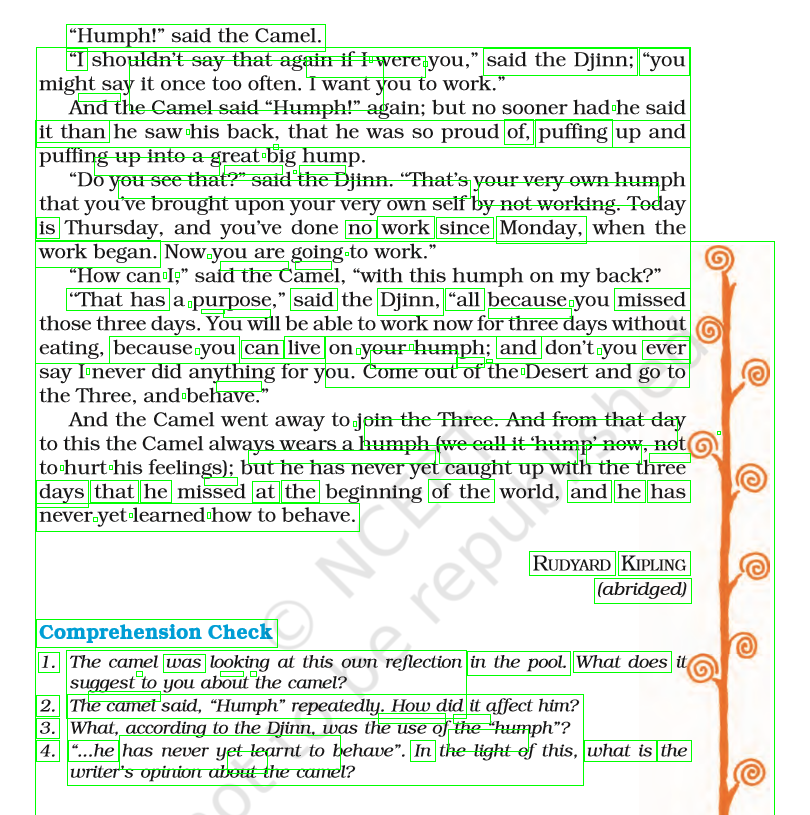

In [8]:
im1 = cv2.imread(file, 0)
im = cv2.imread(file)

ret, thresh1 = cv2.threshold(im1, 180, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((5,5), np.uint8)
dilated = cv2.dilate(thresh1, kernel, iterations = 2)
contours, hierarchy = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),1)
    
cv2.namedWindow('BoundingBox', cv2.WINDOW_NORMAL)
cv2.imwrite('BoundingBox4.png', im)

from IPython.display import Image
Image(filename='BoundingBox4.png')

# Chracter Recognition 

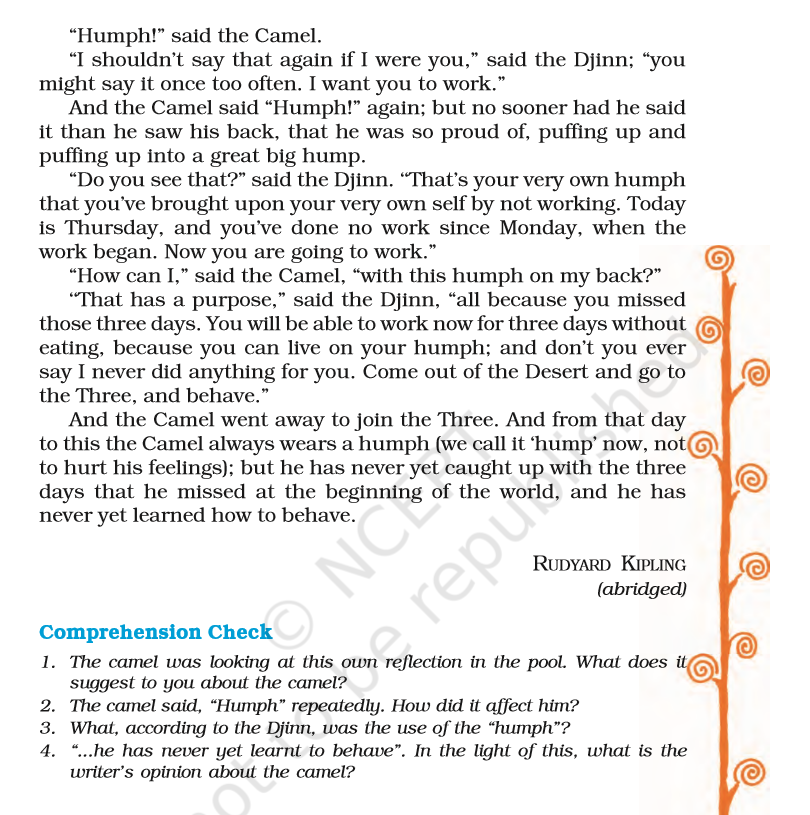

In [9]:
file = r'Screenshot (52).png'
im1 = cv2.imread(file, 0)
im = cv2.imread(file)
ret, thresh1 = cv2.threshold(im1, 180,280, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
i=0
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    #following if statement is to ignore the noises and save the images which are of normal size(character) In order to write more general code,
    #than specifying the dimensions as 100, number of characters should be divided by word dimension
    if w>150 and h>150:
        #save the individual images
        cv2.imwrite(str(i)+".png",thresh1[y:y+h,x:x+w])
        i+=1
cv2.namedWindow('BoundingBox', cv2.WINDOW_NORMAL)
cv2.imwrite('BoundingBox3.png',im)
from IPython.display import Image
Image(filename = 'BoundingBox3.png')
    

In [12]:
file = r'0.png'
image = PIL.Image.open(file)
config = ("-l eng --oem 2 --psm 3")
text = pytesseract.image_to_string(image, config=config)
print(text)

“Humph!” said the Camel.

“I shouldn't say that again if I were you,” said the Djinn; “you
might say it once too often. I want you to work.”

And the Camel said “Humph!“ again: but no sooner had he said
it than he saw his back, that he was so proud of. puffing up and
pufﬂng up into a great big hump.

“Do you see that?” said the Djinn. “That's your very own humph
that you‘ve brought upon your very own self by not working. Today
is Thursday, and you‘ve done no work since Monday, when the
work began. Now you are going to work.”

“How can I,” said the Camel, “with this humph on my back?”

“That has a purpose,‘ said the Djinn, “all because you missed
those three days. You will be able to work now for three days without
eating. because you can live on your humph: and don't you ever
say I never did anything for you. Come out of the Desert and go to
the Three, and behave.”

And the Camel went away to join the Three. And from that day
to this the Camel always wears a humph (we call it ‘hump’ no

In [13]:
import pickle

In [14]:
pickle.dump(text, open('model.pkl', 'wb'))

In [15]:
model = pickle.load(open('model.pkl', 'rb'))

# Creating Boundry through each characters

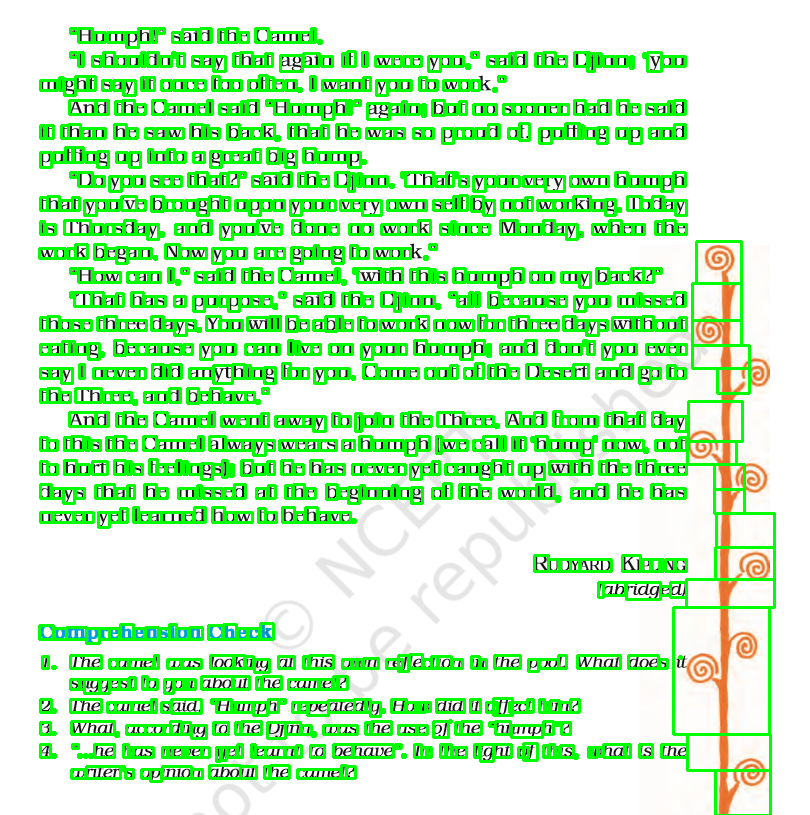

In [14]:
file = r'Screenshot (52).png'
img = cv2.imread(file)
h,w, _ = img.shape

boxes = pytesseract.image_to_boxes(img).split('\n')
# Box = list(map(lambda box:(box[:1],list(map(int,box[2:][:-2].split(' ')))),boxes))

# draw the bounding boxes on the image
for b in boxes:
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
    
# show annotated image and wait for keypress, cv2.imshow(files[0], img)

cv2.imwrite('exbox.png', img)

from IPython.display import Image 
Image(filename = 'exbox.png')


In [15]:
contours[0].shape

(785, 1, 2)

In [18]:
import pickle

In [24]:
# open a file, where you want to store the data
file = open('save_model', 'wb')
# dump information to that file
pickle.dump(file)
# close the file
file.close()


TypeError: dump() missing required argument 'file' (pos 2)